# 3.4 영화 리뷰 분류: 이진 분류 예제

## 3.4.1 IMDB 데이터셋

### 코드 3-1 데이터셋 로드

In [59]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# print (max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()

# print (word_index)

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# print (decoded_review)



## 3.4.2 데이터 준비

### 코드 3-2 정수 시퀀스를 이진 행렬로 인코딩

In [5]:
import numpy as np

# 훈련, 테스트 데이터를 벡터화 시키기 위한 함수
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기

## 코드 3-3 모델 정의

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 코드3-4 모델 컴파일

In [8]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 코드 3-5 옵티마이저 설정

In [9]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 코드 3-6 손실과 측정을 함수 객체로 지정

In [12]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 3.4.4 훈련 검증

### 코드 3-7 검증 세트 준비

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 코드 3-8 모델 훈련

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
               metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.5432 - acc: 0.7709 - val_loss: 0.4272 - val_acc: 0.8496
Epoch 2/20
15000/15000 [==============================] - 1s 84us/sample - loss: 0.3359 - acc: 0.8963 - val_loss: 0.3207 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.2416 - acc: 0.9197 - val_loss: 0.2812 - val_acc: 0.8902
Epoch 4/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1892 - acc: 0.9381 - val_loss: 0.2770 - val_acc: 0.8885
Epoch 5/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1514 - acc: 0.9510 - val_loss: 0.2853 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1260 - acc: 0.9606 - val_loss: 0.2870 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1045 - acc: 0.9684 - val_loss: 0

In [20]:
# model.fit() 메서드는 History 객체를 반환하며, 이 객체는 훈련동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가짐
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 코드 3-9 훈련과 검증 손실 그리기

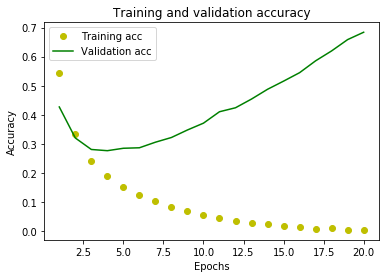

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'yo', label='Training acc')
plt.plot(epochs, val_loss, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 훈련 3-10 훈련과 검증 정확도 그리기

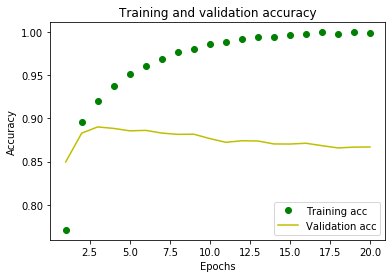

In [38]:
plt.clf() #------ 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 코드 3-11 모델을 처음부터 다시 훈련

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 57us/sample - loss: 0.5005 - acc: 0.7958
Epoch 2/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2864 - acc: 0.9070
Epoch 3/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.2116 - acc: 0.9274
Epoch 4/4
25000/25000 [==============================] - 1s 57us/sample - loss: 0.2908 - acc: 0.8847


In [55]:
model.predict(x_test)

array([[0.23882046],
       [0.9976257 ],
       [0.94269586],
       ...,
       [0.11431727],
       [0.09117499],
       [0.7000292 ]], dtype=float32)